In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np
from numpy import savetxt
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("resources/medium_loans_no_geo.csv")

In [31]:
retypes={'agency_code':'str'
,'loan_type':'str'
,'property_type':'str'
,'loan_amount_000s':'int64'
,'preapproval':'str'
,'action_taken':'int8'
,'applicant_ethnicity':'str'
,'co_applicant_ethnicity':'str'
,'applicant_race_1':'str'
,'co_applicant_race_1':'str'
,'applicant_sex':'str'
,'co_applicant_sex':'str'
,'applicant_income_000s':'int64'
,'purchaser_type':'str'}

In [32]:
# categorical fields to strings for one-hot encoding
df = df.astype(retypes)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              500000 non-null  int64 
 1   agency_code             500000 non-null  object
 2   loan_type               500000 non-null  object
 3   property_type           500000 non-null  object
 4   loan_amount_000s        500000 non-null  int64 
 5   preapproval             500000 non-null  object
 6   action_taken            500000 non-null  int8  
 7   applicant_ethnicity     500000 non-null  object
 8   co_applicant_ethnicity  500000 non-null  object
 9   applicant_race_1        500000 non-null  object
 10  co_applicant_race_1     500000 non-null  object
 11  applicant_sex           500000 non-null  object
 12  co_applicant_sex        500000 non-null  object
 13  applicant_income_000s   500000 non-null  int64 
 14  purchaser_type          500000 non-n

In [34]:
X = df.drop(columns=['action_taken','Unnamed: 0'])
X

,agency_code,loan_type,property_type,loan_amount_000s,preapproval,applicant_ethnicity,co_applicant_ethnicity,applicant_race_1,co_applicant_race_1,applicant_sex,co_applicant_sex,applicant_income_000s,purchaser_type
0,7,1,2,84,3,3,5,5,8,2,5,30,0
1,9,1,1,533,3,2,2,5,5,1,2,287,0
2,9,1,1,307,3,2,5,5,8,1,5,126,3
3,7,1,1,258,2,2,5,3,8,2,5,49,0
4,7,1,1,288,2,2,3,6,6,1,2,191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,9,1,1,171,2,2,2,4,5,1,2,120,5
499996,2,2,1,134,2,2,5,5,8,2,5,78,2
499997,1,1,1,84,3,2,5,5,8,2,5,42,9
499998,9,2,1,73,3,2,2,5,5,1,2,25,2


In [35]:
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['loan_amount_000s', 'applicant_income_000s', 'agency_code_1',
       'agency_code_2', 'agency_code_3', 'agency_code_5', 'agency_code_7',
       'agency_code_9', 'loan_type_1', 'loan_type_2', 'loan_type_3',
       'loan_type_4', 'property_type_1', 'property_type_2', 'preapproval_1',
       'preapproval_2', 'preapproval_3', 'applicant_ethnicity_1',
       'applicant_ethnicity_2', 'applicant_ethnicity_3',
       'applicant_ethnicity_4', 'co_applicant_ethnicity_1',
       'co_applicant_ethnicity_2', 'co_applicant_ethnicity_3',
       'co_applicant_ethnicity_4', 'co_applicant_ethnicity_5',
       'applicant_race_1_1', 'applicant_race_1_2', 'applicant_race_1_3',
       'applicant_race_1_4', 'applicant_race_1_5', 'applicant_race_1_6',
       'applicant_race_1_7', 'co_applicant_race_1_1', 'co_applicant_race_1_2',
       'co_applicant_race_1_3', 'co_applicant_race_1_4',
       'co_applicant_race_1_5', 'co_applicant_race_1_6',
       'co_applicant_race_1_7', 'co_applicant_race_1_8', 'appl

,loan_amount_000s,applicant_income_000s,agency_code_1,agency_code_2,agency_code_3,agency_code_5,agency_code_7,agency_code_9,loan_type_1,loan_type_2,...,purchaser_type_0,purchaser_type_1,purchaser_type_2,purchaser_type_3,purchaser_type_4,purchaser_type_5,purchaser_type_6,purchaser_type_7,purchaser_type_8,purchaser_type_9
0,84,30,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,533,287,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,307,126,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,258,49,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,288,191,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,171,120,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
499996,134,78,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
499997,84,42,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
499998,73,25,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [36]:
# Split our preprocessed data into our features and target arrays

y = df['action_taken']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=42)

In [37]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [39]:
classifier.fit(X_train_scaled, y_train)

/Users/reiderwin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8969146666666666
Testing Data Score: 0.897344


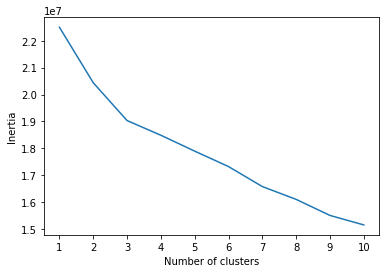

In [41]:
from sklearn.cluster import KMeans

inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_train_scaled)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()